In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install SimpleITK

     |████████████████████████████████| 47.4MB 61kB/s 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import six
import SimpleITK as sitk
import skimage
from skimage import data
from skimage import io


for dirname, _, filenames in os.walk('/content/drive/My Drive/pixel'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/pixel/Figure.jpg
/content/drive/My Drive/pixel/flair.nii
/content/drive/My Drive/pixel/fflair.nii
/content/drive/My Drive/pixel/seg.nii
/content/drive/My Drive/pixel/figure1.jpg
/content/drive/My Drive/pixel/capture7.jpg
/content/drive/My Drive/pixel/essai2.jpg
/content/drive/My Drive/pixel/tumeur1.jpeg
/content/drive/My Drive/pixel/tumeur2.jpg
/content/drive/My Drive/pixel/whole.jpg
/content/drive/My Drive/pixel/Brats17/Brats17_TCIA_332_1_seg.nii
/content/drive/My Drive/pixel/Brats17/Brats17_TCIA_331_1_seg.nii
/content/drive/My Drive/pixel/Brats17/Brats17_TCIA_335_1_seg.nii
/content/drive/My Drive/pixel/Brats17/tumeur1.jpeg
/content/drive/My Drive/pixel/essai/Brats17_TCIA_331_1_t1ce.nii
/content/drive/My Drive/pixel/essai/Brats17_TCIA_331_1_t2.nii
/content/drive/My Drive/pixel/essai/Brats17_TCIA_331_1_t1.nii
/content/drive/My Drive/pixel/essai/Brats17_TCIA_331_1_flair.nii
/content/drive/My Drive/pixel/essai/Brats17_TCIA_331_1_seg.nii
/content/drive/My Drive/pix

In [ ]:
%cd /content/drive/My Drive/pixel
!ls

/content/drive/My Drive/pixel
capture7.jpg  essai.jpg     exemple2.png  fflair.nii   flair.nii
Capture.JPG   exemple1.jpg  exemple3.jpg  figure1.jpg  seg.nii
essai2.jpg    exemple2.jpg  exemple.jpg   Figure.jpg


**Visualiser l'image au format nii afin de l'enregistrer en jpg**

dimension de l image : (155, 240, 240)


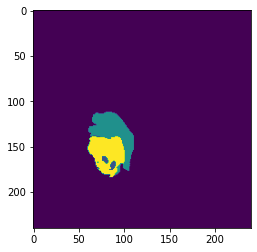

In [ ]:
img = sitk.ReadImage('/content/drive/MyDrive/pixel/Brats3/Brats17_TCIA_361_1_seg.nii.gz')   #lire image format nii
img = sitk.GetArrayFromImage(img)
data = np.array(img)
print('dimension de l image :', data.shape) 
plt.imshow(img[100])
plt.show()

**Visualiser l'image au format jpg**

dimension de l image : (239, 240, 3)


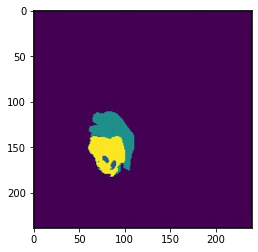

In [ ]:
image = Image.open('/content/drive/MyDrive/pixel/tumeur2.jpg')
image=np.array(image)
print('dimension de l image :', image.shape) 
plt.imshow(image)
plt.show()

**parcourir tous les pixels de l'image entière et calculer le nombre de pixel de couleur**

pixels jaune: x=(200,256); y=(200,256); z=(0,120)

pixels bleu: x=(35,115); y=(75,130); z=(85,145)

pixels vert: x=(0,75); y=(100,155); z=(120,160)

In [ ]:
zone_couleur=0;
for i in range(125,190): #fenetre de la tumeur
    for j in range(55,110):
      #x, y, z = image[i,j];
      #image[i, j] = (x, y,z);
      for x in range(200,256):
        for y in range(200,256):
          for z in range(0,121):
            if np.all([x, y,z]==image[i,j]):
                print(image[i,j],[i,j]);
                zone_couleur=zone_couleur+1;
print(zone_couleur)  

[242 230  58] [139, 66]
[255 237  41] [139, 67]
[250 234  37] [139, 68]
[244 237  35] [139, 91]
[253 239  29] [139, 92]
[255 233  51] [140, 64]
[250 225  36] [140, 65]
[255 234  33] [140, 66]
[255 230  22] [140, 67]
[255 231  25] [140, 68]
[255 232  36] [140, 69]
[246 227  45] [140, 70]
[241 227  56] [140, 71]
[244 231  64] [140, 72]
[245 232  58] [140, 73]
[245 231  47] [140, 74]
[244 231  41] [140, 75]
[243 235  46] [140, 76]
[241 236  33] [140, 89]
[250 232  34] [140, 90]
[255 230  32] [140, 91]
[255 222  21] [140, 92]
[254 228  30] [140, 93]
[240 231  42] [140, 94]
[255 235  20] [141, 64]
[253 231  23] [141, 65]
[247 223  25] [141, 66]
[255 233  45] [141, 67]
[252 228  44] [141, 68]
[248 224  38] [141, 69]
[252 229  35] [141, 70]
[253 232  27] [141, 71]
[254 230  16] [141, 72]
[255 231  15] [141, 73]
[255 230  12] [141, 74]
[255 231  19] [141, 75]
[255 230  21] [141, 76]
[252 226  19] [141, 77]
[255 233  29] [141, 78]
[253 235  31] [141, 79]
[255 228  31] [141, 80]
[241 233  47] [1

In [ ]:
print('le volume représenté est de : ' , zone_couleur , 'mm^3')

le volume représentant l oedeme est de :  1217 mm^3


Calculer la valeur de la tumeur entiere: tout les autres pixel hormis le violet

In [ ]:
tumeur=0;
for i in range(100,190):
    for j in range(50,120):
      x, y, z = image[i,j];
      image[i, j] = (x, y,z);
      if x<65 or x>75:
        if y>5 :
          if z<75 or z>86:
            print(image[i,j],[i,j]);
            tumeur=tumeur+1;
print(tumeur)   

[38 22 87] [110, 83]
[48 23 91] [110, 86]
[ 83  82 142] [111, 80]
[ 94  96 155] [111, 81]
[ 82  91 148] [111, 82]
[ 81  94 149] [111, 83]
[ 86  95 152] [111, 85]
[ 91  90 150] [111, 86]
[48 27 94] [111, 87]
[ 62  96 134] [112, 69]
[ 50 121 141] [112, 70]
[ 58 120 143] [112, 71]
[28 52 90] [112, 72]
[52  8 87] [112, 75]
[50 13 90] [112, 76]
[ 62  97 139] [112, 78]
[ 48 118 143] [112, 79]
[ 37 143 143] [112, 80]
[ 32 147 144] [112, 81]
[ 24 149 143] [112, 82]
[ 23 150 143] [112, 83]
[ 29 148 144] [112, 84]
[ 37 143 143] [112, 85]
[ 42 135 140] [112, 86]
[ 45 129 139] [112, 87]
[ 53 125 140] [112, 88]
[ 63 108 137] [112, 89]
[36 44 90] [112, 90]
[54  7 87] [112, 105]
[24 10 71] [113, 67]
[ 52  77 118] [113, 68]
[ 47 137 146] [113, 70]
[ 53 137 147] [113, 71]
[ 54 115 136] [113, 72]
[ 63 101 137] [113, 73]
[ 53  99 133] [113, 77]
[ 60 131 153] [113, 78]
[ 51 141 152] [113, 79]
[ 37 141 142] [113, 80]
[ 33 143 142] [113, 81]
[ 27 146 142] [113, 82]
[ 24 147 142] [113, 83]
[ 27 146 140] [113

In [ ]:
print('le volume de la tumeur entière vaut', tumeur , 'mm^3')

le volume de la tumeur entière vaut 2671 mm^3


VOLUME du coeur de la tumeur

dimension de l image : (239, 240, 3)


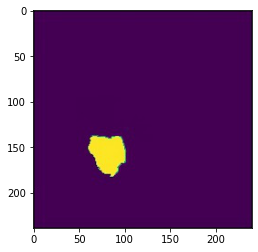

In [ ]:
image = Image.open('/content/drive/MyDrive/pixel/heart.jpg')
image=np.array(image)
print('dimension de l image :', image.shape) 
plt.imshow(image)
plt.show()

In [1]:
zone_couleur=0;
for i in range(130,185): #fenetre de la tumeur
    for j in range(59,105):
      #x, y, z = image[i,j];
      #image[i, j] = (x, y,z);
      for x in range(200,256):
        for y in range(200,256):
          for z in range(0,120):
            if np.all([x, y,z]==image[i,j]):
                print(image[i,j],[i,j]);
                zone_couleur=zone_couleur+1;
print(zone_couleur)  

NameError: ignored